In [1]:
import requests

In [2]:
!apt install tesseract-ocr libtesseract-dev libmagichwand-dev

The operation couldn’t be completed. Unable to locate a Java Runtime.
Please visit http://www.java.com for information on installing Java.



In [3]:
from IPython.display import HTML,clear_output

In [4]:
#!pip install pytesseract wand opencv-pythoni
clear_output()

In [5]:
from PIL import Image 
import pytesseract
import cv2 
import numpy as np 
from pytesseract import Output
import re 

In [6]:
image=Image.open(requests.get('https://i.stack.imgur.com/pbIdS.png',stream=True).raw)
image=image.resize((400,200))
image.save('img1.png')

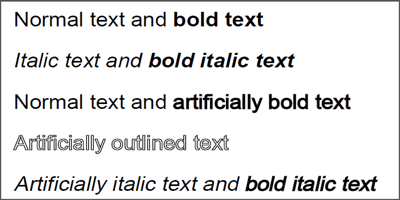

In [7]:
image

In [9]:
# Tesseract OCR configuration
custom_config = r'-l eng --oem 3 --psm 6'
my_extracted_text=pytesseract.image_to_string(image, config=custom_config)
print(my_extracted_text)

Normal text and bold text

Italic text and bold italic text

Normal text and artificially bold text
Artificially outlined text

Artificially italic text and bold italic text



In [10]:
#preprocess text 
try:
    my_extracted_text=pytesseract.image_to_string(image,lang='eng')
    characters_to_remove="!()@-*>+-/,'#$%&?;:^~`.<\|?"
    new_string=my_extracted_text
    for char in characters_to_remove:
        new_string=new_string.replace(char, "")
    print(new_string)
except IOError as e:
    print("error (%s)..." % e)

Normal text and bold text

Italic text and bold italic text

Normal text and artificially bold text
Artificially outlined text

Artificially italic text and bold italic text




In [13]:
#text from image with cv
image=cv2.imread('/Users/rohansridhar/Desktop/GOOGLE-Solution-Challenge-2024/static/uploads/img1.png')

In [16]:
#color to grayscale
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray=get_grayscale(image)
print(gray)

[[ 86  80  79 ...  79  80  86]
 [ 85 136 149 ... 149 136  85]
 [ 82 227 255 ... 255 227  82]
 ...
 [ 82 223 255 ... 255 223  82]
 [ 82 204 234 ... 234 204  82]
 [ 86  89  90 ...  90  89  86]]


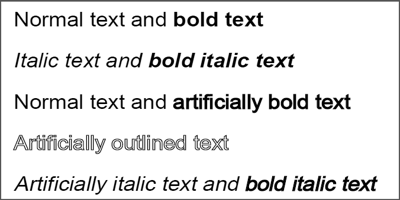

In [17]:
Image.fromarray(gray)

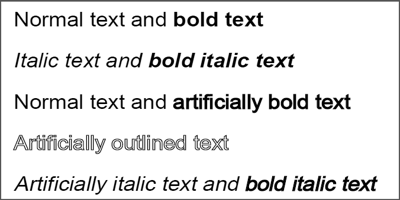

In [20]:
def remove_noise_from_image(image):
    return cv2.medianBlur(image,5)
noise=remove_noise_from_image(gray)
Image.fromarray(gray)

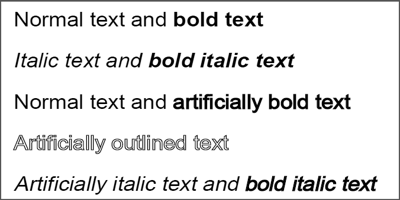

In [21]:
#threshold transformation 
def threshold_transformation(image):
    return cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
thresh=threshold_transformation(gray)
Image.fromarray(gray)
#This function takes a grayscale input image and applies Otsu's binarization thresholding using cv2.threshold() with the cv2.THRESH_BINARY + cv2.THRESH_OTSU flag. This method automatically calculates the threshold value based on the image histogram. The function returns the binarized image.

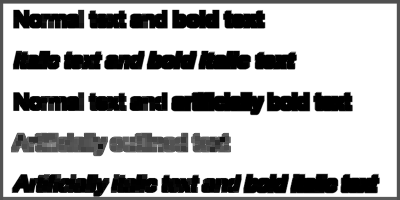

In [24]:
#erodes away the boundaries of foreground objects
def erode_image(image):
    kernel=np.ones((5,5),np.uint8)
    return cv2.erode(image,kernel,iterations = 1)
erode=erode_image(gray)
Image.fromarray(erode)

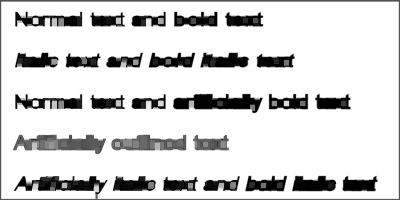

In [25]:
def morphing_image(image):
    kernal=np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image,cv2.MORPH_OPEN,kernal)
morhimage=morphing_image(gray)
Image.fromarray(morhimage)

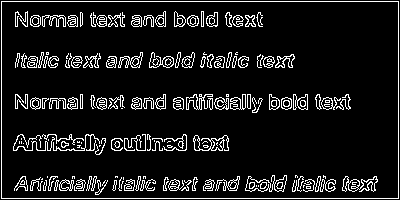

In [30]:
#detect edges black to white & vice versa
def canny_edge_detection(image):
    return cv2.Canny(image, 300, 400)
canny= canny_edge_detection(gray)
Image.fromarray(canny)

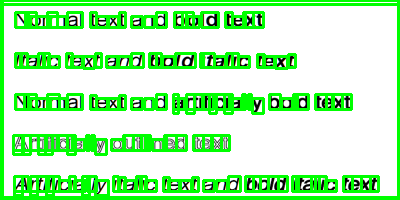

In [37]:
image1=cv2.imread('/Users/rohansridhar/Desktop/GOOGLE-Solution-Challenge-2024/static/uploads/img1.png')
h, w, c = image1.shape
boxes = pytesseract.image_to_boxes(image1) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(image1, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
Image.fromarray(img)

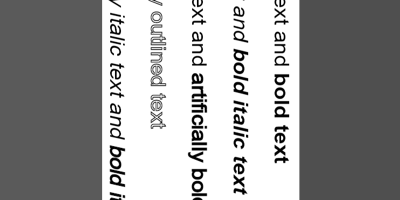

In [38]:
#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated
rotated = deskew(gray)
Image.fromarray(rotated)

In [39]:
#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
match = match_template(gray, gray)
match

array([[0.9999985]], dtype=float32)